<a href="https://colab.research.google.com/github/ljpetkovic/Charcot_circulations/blob/main/dataviz/dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF (TermSuite) vs. TF-IDF (classique) vs. BM25 vs. _PatternRank_

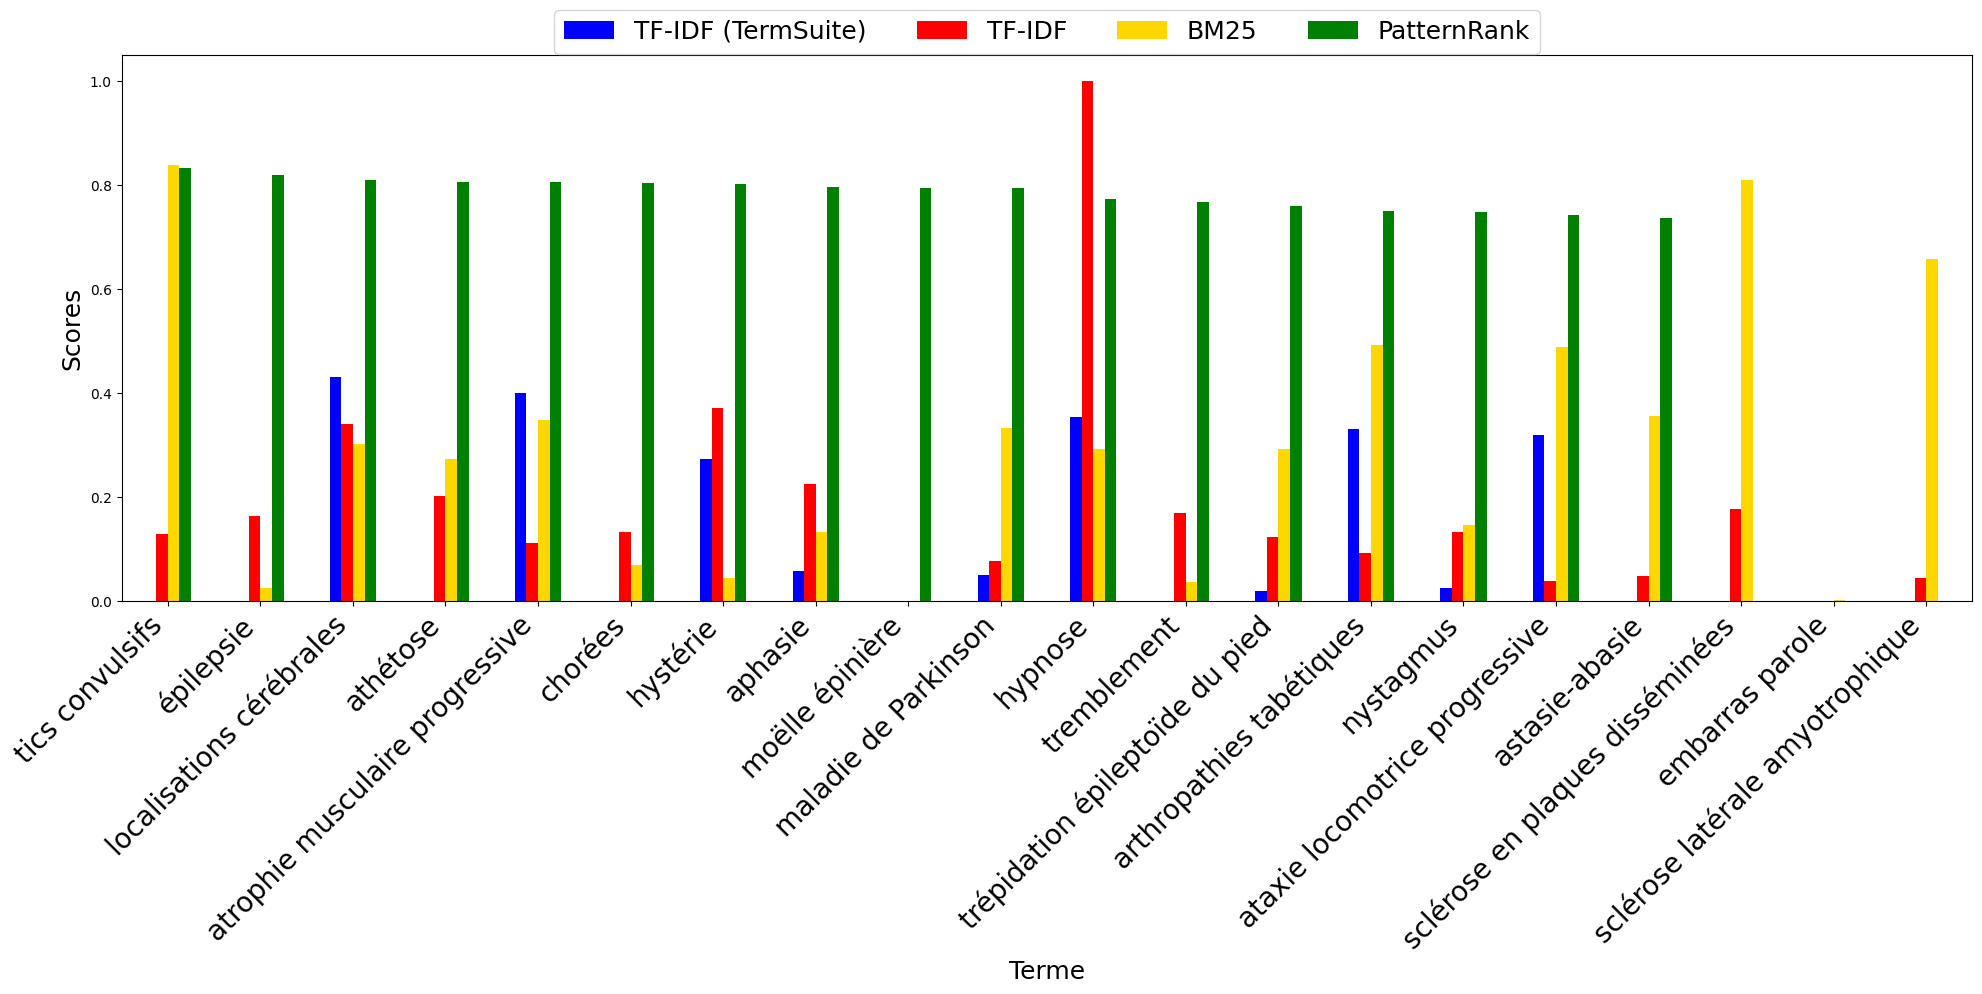

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    "Terme": [
        "tics convulsifs", "épilepsie", "localisations cérébrales", "atrophie musculaire progressive", "athétose",
        "chorées", "hystérie", "aphasie", "maladie de Parkinson", "hypnose", "tremblement",
        "trépidation épileptoïde du pied", "moëlle épinière",
        "arthropathies tabétiques", "nystagmus", "ataxie locomotrice progressive",
        "astasie-abasie", "sclérose en plaques disséminées", "embarras parole",
        "sclérose latérale amyotrophique"
    ],
    "TF-IDF (TermSuite)": [
        None, None, 0.43, 0.40, None, None, 0.2724, 0.0587, 0.05, 0.3543, None,
        0.0198, None, 0.33, 0.0243, 0.32, None, None, None, None
    ],
    "TF-IDF": [
        0.1293, 0.164, 0.34, 0.1118, 0.2029, 0.1336, 0.3711, 0.2245, 0.0775, 1, 0.1686,
        0.1227, None, 0.0934, 0.1326, 0.0386, 0.0478, 0.178, None, 0.044
    ],
    "BM25": [
        0.8385, 0.0247, 0.3017, 0.3489, 0.274, 0.0701, 0.0442, 0.1334, 0.333, 0.2922, 0.0362,
        0.2919, None, 0.4928, 0.146, 0.4877, 0.3565, 0.8089, 0.0018, 0.6586
    ],
    "PatternRank": [
        0.8331, 0.8199, 0.8090, 0.8053, 0.8068, 0.8047, 0.8018, 0.7960, 0.7936, 0.7738, 0.7683,
        0.7597, 0.7937, 0.7506, 0.7474, 0.7431, 0.7375, None, None, None
    ]
}

df = pd.DataFrame(data)
df.set_index("Terme", inplace=True)

# Sort by PatternRank descending, keeping NA at the end
df_sorted = df.sort_values(by="PatternRank", ascending=False, na_position='last')

# Plot
ax = df_sorted.plot(kind="bar", figsize=(20, 10),
                    color=["blue", "red", "gold", "green"],
                    edgecolor='none')

# Legend position
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.98), ncol=4, fontsize=18)

# Labels and layout
plt.ylabel("Scores", fontsize=18)
plt.xlabel("Terme", fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.tight_layout()

# Save and display
plt.savefig('termes_viz.png', dpi=600)
plt.show()


# Cooccurrences TXM

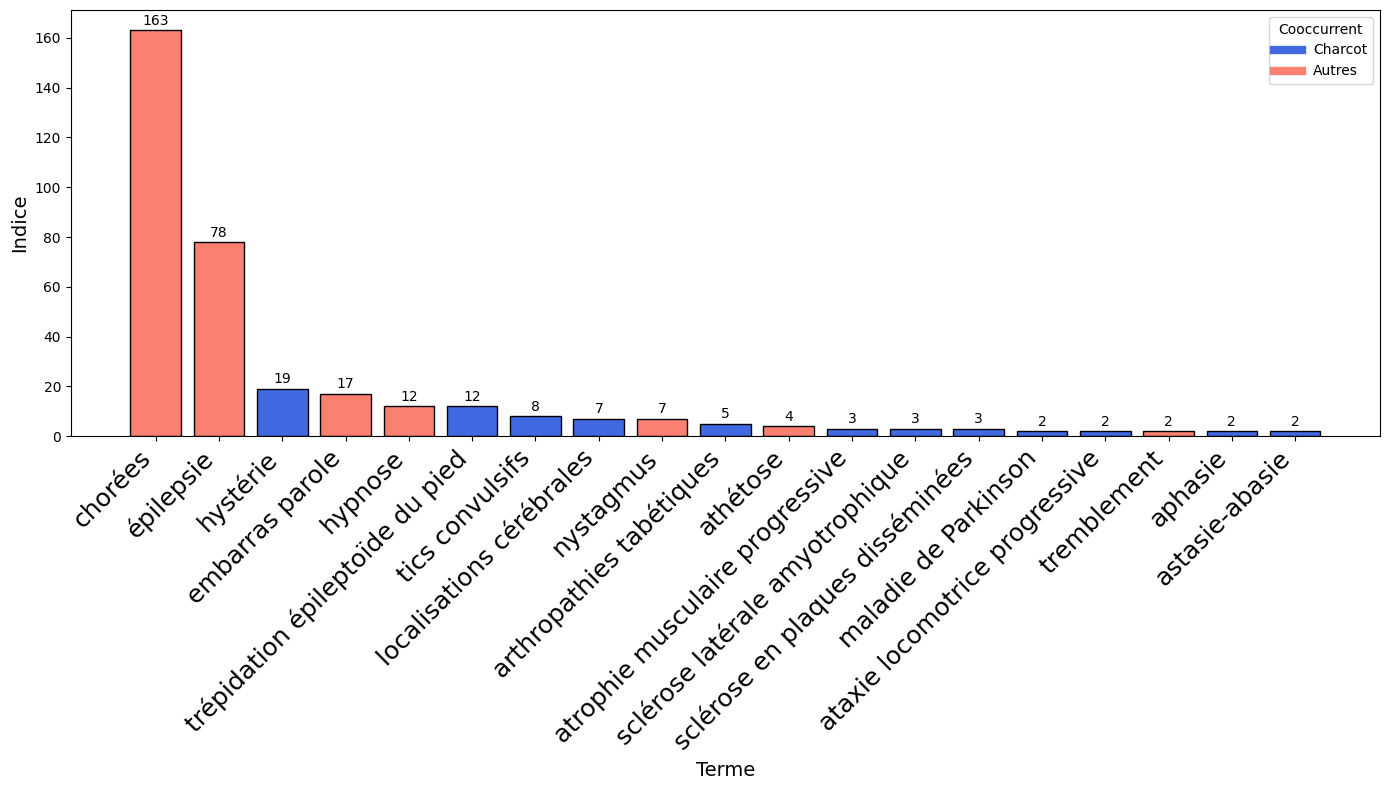

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Données extraites du tableau
data = {
    "Terme": [
        "maladie de Parkinson", "ataxie locomotrice progressive", "arthropathies tabétiques",
        "trépidation épileptoïde du pied", "sclérose en plaques disséminées", "tremblement",
        "nystagmus", "embarras parole", "sclérose latérale amyotrophique", "tics convulsifs",
        "atrophie musculaire progressive", "aphasie", "astasie-abasie", "athétose", "chorées",
        "hystérie", "épilepsie", "hypnose", "localisations cérébrales"
    ],
    "Cooccurrent": [
        "Charcot", "Charcot", "Charcot", "Babinski • Charcot", "Charcot", "Achard", "Barany",
        "Chervin", "Charcot", "Charcot", "Charcot", "Charcot", "Charcot", "Hammond", "Sydenham",
        "Charcot", "Jackson", "Braid", "Charcot"
    ],
    "Indice": [
        2, 2, 5, 12, 3, 2, 7, 17, 3, 8, 3, 2, 2, 4, 163, 19, 78, 12, 7
    ]
}

df = pd.DataFrame(data)

# Ajout d'une colonne couleur
df["Couleur"] = df["Cooccurrent"].apply(lambda x: "royalblue" if "Charcot" in x else "salmon")

# Trier par Indice décroissant
df_sorted = df.sort_values("Indice", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
bars = plt.bar(df_sorted["Terme"], df_sorted["Indice"], color=df_sorted["Couleur"], edgecolor="black")

# Annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.ylabel("Indice", fontsize=14)
plt.xlabel("Terme", fontsize=14)
#plt.title("Indice de cooccurrence par terme (Charcot vs autres)", fontsize=16)
plt.legend(handles=[
    plt.Line2D([0], [0], color="royalblue", lw=6, label="Charcot"),
    plt.Line2D([0], [0], color="salmon", lw=6, label="Autres")
], title="Cooccurrent", loc="upper right")

plt.tight_layout()
plt.savefig('cooccurrences.png', dpi=600)
plt.show()


## Termes communs pour les scores entre 0,1 et 1 (dataviz intéractive à lancer dans Google Colab)

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("termes_communs_tfidf.csv")

# Convert TF-IDF values to float
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Optional: filter TF-IDF scores within a certain range
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.0) & (df['tfIdf_Charcot'] <= 1.0) &
    (df['tfIdf_Autres'] >= 0.0) & (df['tfIdf_Autres'] <= 1.0)
].copy()

# Create interactive scatter plot with different colors for each term
fig = px.scatter(
    plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    color="lemma",               # <-- Use color by lemma to get different colors
    text="lemma",
    hover_name="lemma",
    labels={
        "tfIdf_Charcot": "TF-IDF (Charcot)",
        "tfIdf_Autres": "TF-IDF (Autres)"
    },
    width=900,
    height=700
)

# Style adjustments
fig.update_traces(textposition='top center', marker=dict(size=10))

# Set white background and clean layout
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

# Show interactive plot in browser or Jupyter
fig.show()

fig.write_image("tfidf_plot.png", scale=6)  # ~600 DPI




ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Termes communs pour les scores entre 0,1 et 1 (dataviz intéractive à lancer dans Jupyter Notebook)

In [ ]:
#pip install plotly kaleido

import plotly.io as pio
pio.renderers.default = 'notebook_connected'  # or try 'notebook'

import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("termes_communs_tfidf.csv")

# Convert TF-IDF values to float
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Optional: filter TF-IDF scores within a certain range
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.0) & (df['tfIdf_Charcot'] <= 1.0) &
    (df['tfIdf_Autres'] >= 0.0) & (df['tfIdf_Autres'] <= 1.0)
].copy()

# Create interactive scatter plot with different colors for each term
fig = px.scatter(
    plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    color="lemma",               # <-- Use color by lemma to get different colors
    text="lemma",
    hover_name="lemma",
    labels={
        "tfIdf_Charcot": "TF-IDF (Charcot)",
        "tfIdf_Autres": "TF-IDF (Autres)"
    },
    width=900,
    height=700
)

# Style adjustments
fig.update_traces(textposition='top center', marker=dict(size=10))

# Set white background and clean layout
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

# Show interactive plot in browser or Jupyter
fig.show()

# Export high-resolution PNG
fig.write_image("tfidf_plot.png", scale=6)  # 600 DPI equivalent

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Outliers (z-score)

In [ ]:
from scipy.stats import zscore

# Appliquer z-score sur les colonnes numériques
plot_df[['z_x', 'z_y']] = plot_df[['tfIdf_Charcot', 'tfIdf_Autres']].apply(zscore)

# Définir comme outliers ceux qui ont un z-score > 2
outliers = plot_df[
    (plot_df['z_x'].abs() > 2) | (plot_df['z_y'].abs() > 2)
]

print(outliers[['lemma', 'tfIdf_Charcot', 'tfIdf_Autres']])


              lemma  tfIdf_Charcot  tfIdf_Autres
14         atrophie       0.575416      0.403910
36   circonvolution       0.365858      0.593713
44      contracture       0.453077      0.245476
57         cérébral       1.000000      0.427420
70          externe       0.378696      0.495707
79          frontal       0.344736      0.345397
90    hallucination       0.581297      0.119139
93          hypnose       0.031061      0.354246
94       hypnotique       0.123747      0.495707
95       hypnotisme       0.193490      1.000000
96         hystérie       0.689224      0.272421
137         motrice       0.452829      0.104610
140      musculaire       0.700820      0.374059
175    pathologique       0.658825      0.171113
185      postérieur       0.767084      0.706512
187       psychique       0.594633      0.240721
215          sillon       0.145531      0.413684
225           tabes       0.442392      0.323999
235            tion       0.668931      0.222296


# 15 premiers termes en commun avec `TermSuite`

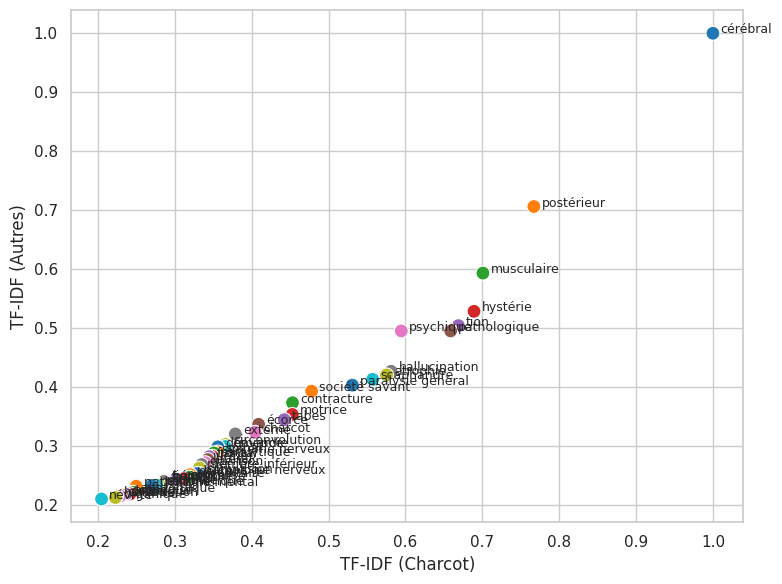

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv("charcot_autres_all.csv")

# Remplacer les virgules par des points dans les colonnes TF-IDF et convertir en float
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].str.replace(',', '.').astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].str.replace(',', '.').astype(float)

# Sélection des 15 premiers termes communs pour l'affichage
plot_df = df.head(50).copy()

# Style seaborn
sns.set(style="whitegrid")

# Création du nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma_Charcot",
    palette="tab10",
    s=100
)

# Annotation de chaque point
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.01,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma_Charcot'].iloc[i],
        fontsize=9
    )

# Étiquettes et titre
plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
# plt.title("Comparaison TF-IDF des 15 premiers termes")
plt.legend([], [], frameon=False)  # Masquer la légende
plt.tight_layout()

# Affichage du graphique
# plt.savefig('15_termes_commun_termsuite.png', dpi=600)
plt.show()


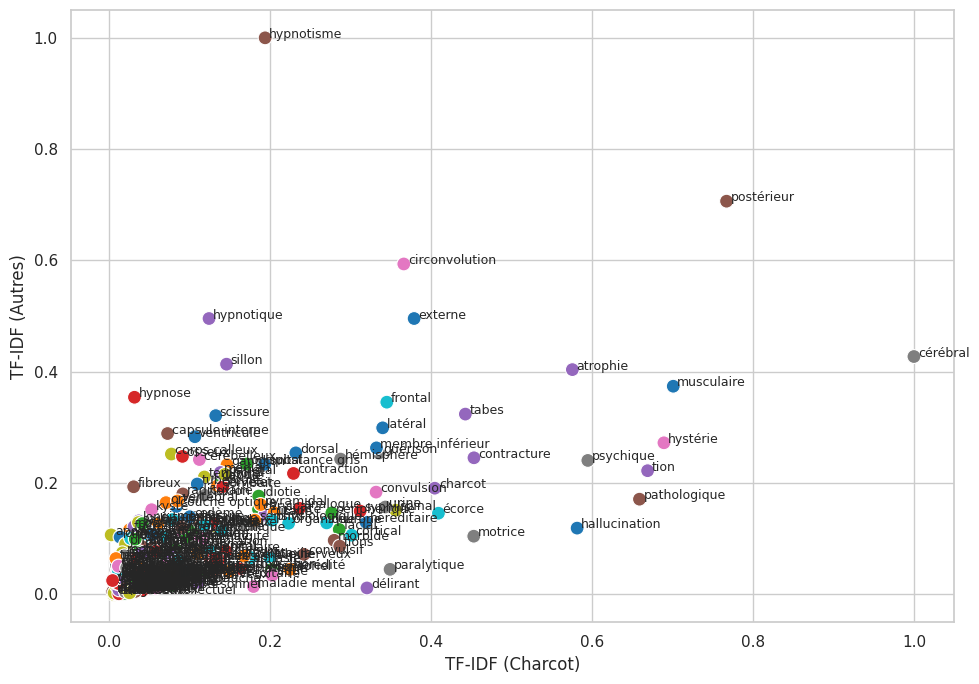

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
df = pd.read_csv("termes_communs_tfidf.csv")

# Pas besoin de remplacer des virgules, les colonnes sont déjà en float
# Si nécessaire, convertir explicitement :
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Filtrer les scores dans l'intervalle désiré
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.0) & (df['tfIdf_Charcot'] <= 1) &
    (df['tfIdf_Autres'] >= 0.0) & (df['tfIdf_Autres'] <= 1)
].copy()

# Tracer
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma",
    palette="tab10",
    s=100
)

# Annoter les points
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.005,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma'].iloc[i],
        fontsize=9
    )

plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
# plt.title("Termes strictement communs avec TF-IDF ∈ [0.0, 1.0]")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig('termes_commun_termsuite_0-1.png', dpi=600)
plt.show()


## Termes communs pour les scores entre 0,0 et 0,25

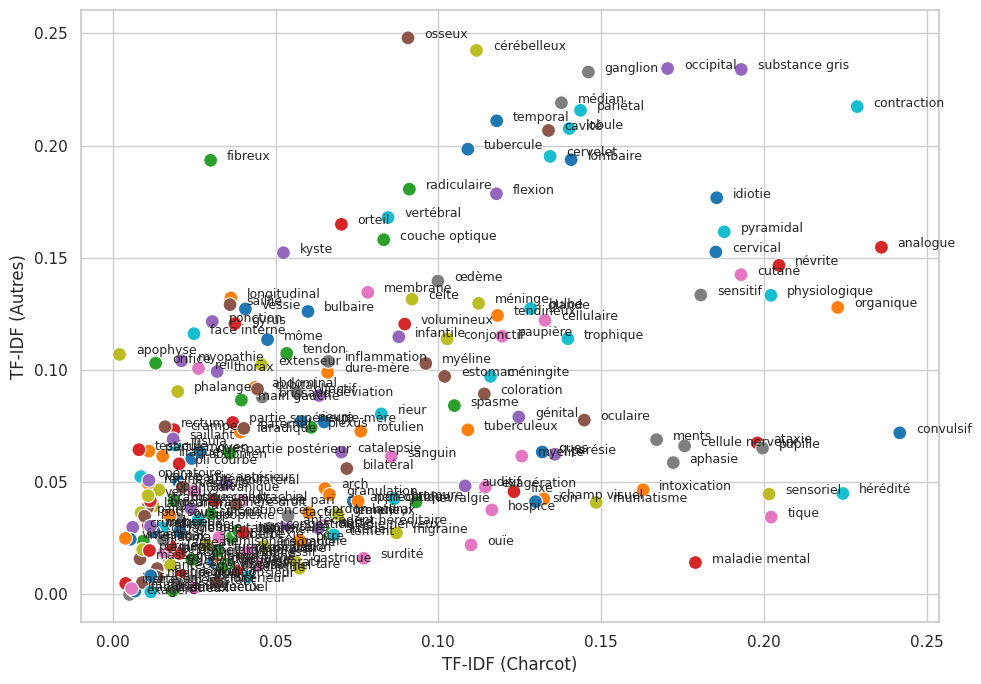

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
df = pd.read_csv("termes_communs_tfidf.csv")

# Pas besoin de remplacer des virgules, les colonnes sont déjà en float
# Si nécessaire, convertir explicitement :
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Filtrer les scores dans l'intervalle désiré
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.0) & (df['tfIdf_Charcot'] <= 0.25) &
    (df['tfIdf_Autres'] >= 0.0) & (df['tfIdf_Autres'] <= 0.25)
].copy()

# Tracer
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma",
    palette="tab10",
    s=100
)

# Annoter les points
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.005,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma'].iloc[i],
        fontsize=9
    )

plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
# plt.title("Termes strictement communs avec TF-IDF ∈ [0.0, 0.25]")
plt.legend([], [], frameon=False)
plt.tight_layout()
#plt.savefig('termes_commun_termsuite_0-1.png', dpi=600)
plt.show()


## Termes communs pour les scores entre 0,25 et 0,50

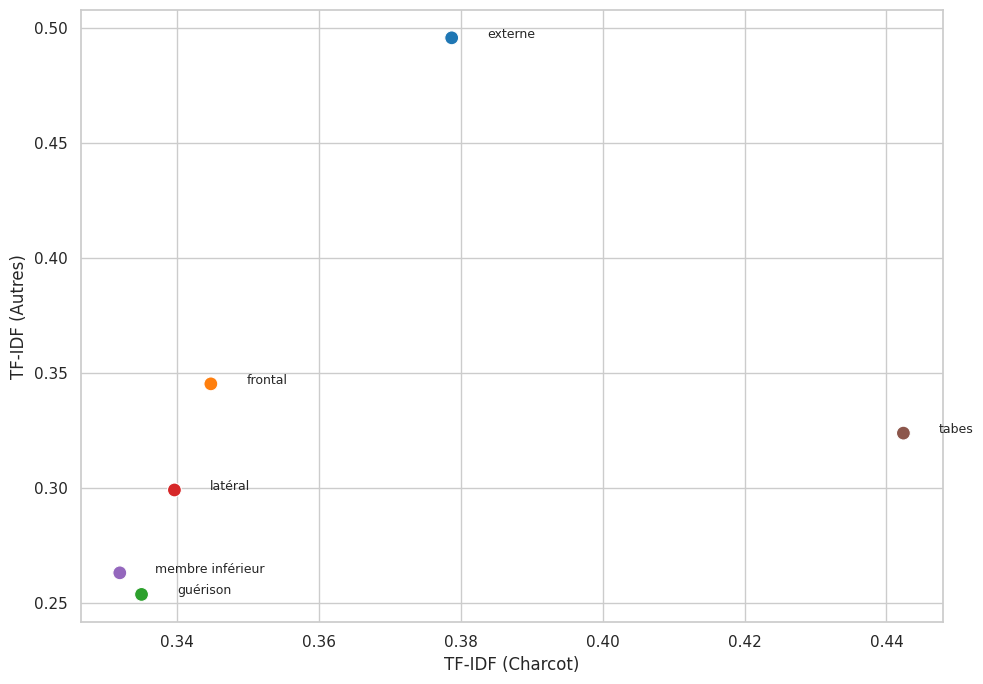

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
df = pd.read_csv("termes_communs_tfidf.csv")

# Pas besoin de remplacer des virgules, les colonnes sont déjà en float
# Si nécessaire, convertir explicitement :
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Filtrer les scores dans l'intervalle désiré
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.25) & (df['tfIdf_Charcot'] <= 0.50) &
    (df['tfIdf_Autres'] >= 0.25) & (df['tfIdf_Autres'] <= 0.50)
].copy()

# Tracer
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma",
    palette="tab10",
    s=100
)

# Annoter les points
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.005,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma'].iloc[i],
        fontsize=9
    )

plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
#plt.title("Termes strictement communs avec TF-IDF ∈ [0.25, 0.50]")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


## Termes communs pour les scores entre 0,50 et 0,75

/tmp/ipython-input-83-1797940375.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


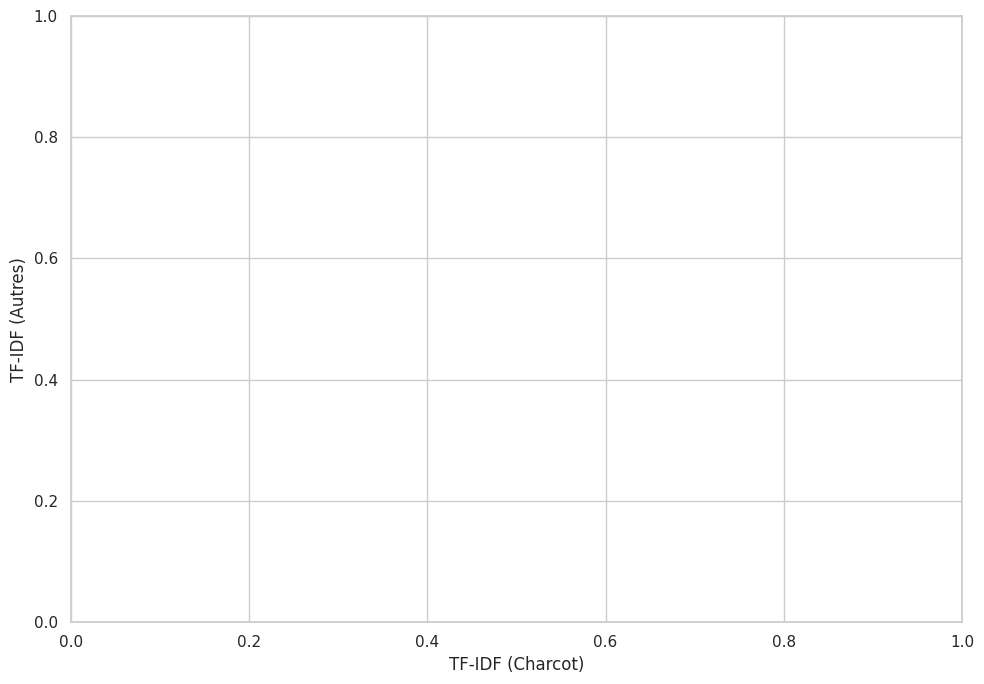

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
df = pd.read_csv("termes_communs_tfidf.csv")

# Pas besoin de remplacer des virgules, les colonnes sont déjà en float
# Si nécessaire, convertir explicitement :
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Filtrer les scores dans l'intervalle désiré
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.50) & (df['tfIdf_Charcot'] <= 0.75) &
    (df['tfIdf_Autres'] >= 0.50) & (df['tfIdf_Autres'] <= 0.75)
].copy()

# Tracer
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma",
    palette="tab10",
    s=100
)

# Annoter les points
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.005,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma'].iloc[i],
        fontsize=9
    )

plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
#plt.title("Termes strictement communs avec TF-IDF ∈ [0.50, 0.75]")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


## Termes communs pour les scores entre 0,75 et 1,00

/tmp/ipython-input-84-3213020231.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


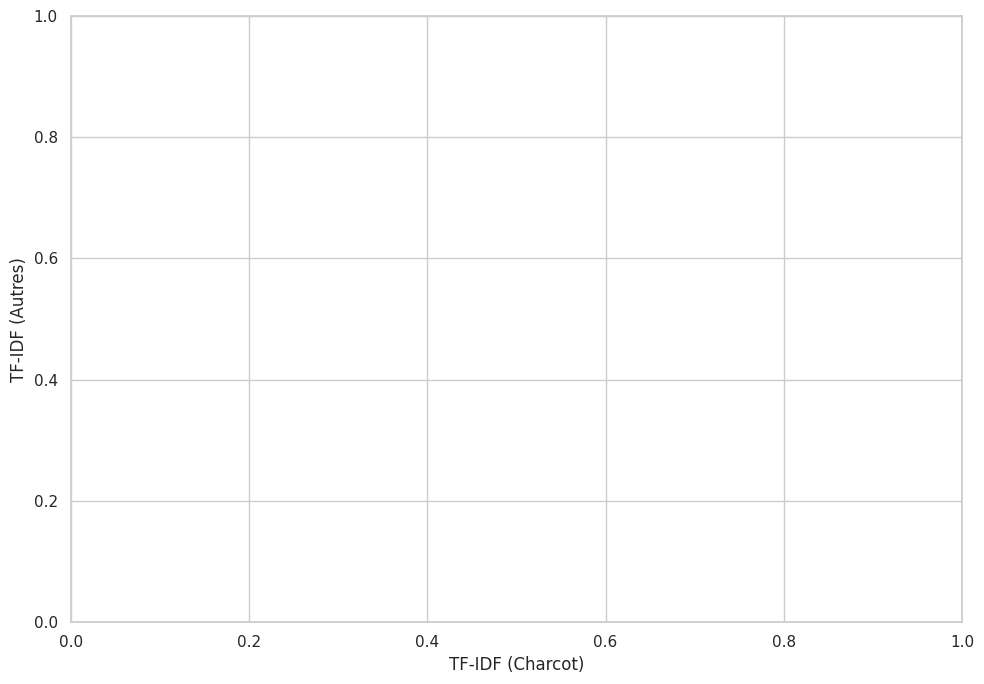

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
df = pd.read_csv("termes_communs_tfidf.csv")

# Pas besoin de remplacer des virgules, les colonnes sont déjà en float
# Si nécessaire, convertir explicitement :
df['tfIdf_Charcot'] = df['tfIdf_Charcot'].astype(float)
df['tfIdf_Autres'] = df['tfIdf_Autres'].astype(float)

# Filtrer les scores dans l'intervalle désiré
plot_df = df[
    (df['tfIdf_Charcot'] >= 0.75) & (df['tfIdf_Charcot'] <= 1.0) &
    (df['tfIdf_Autres'] >= 0.75) & (df['tfIdf_Autres'] <= 1.0)
].copy()

# Tracer
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="tfIdf_Charcot",
    y="tfIdf_Autres",
    hue="lemma",
    palette="tab10",
    s=100
)

# Annoter les points
for i in range(len(plot_df)):
    plt.text(
        plot_df['tfIdf_Charcot'].iloc[i] + 0.005,
        plot_df['tfIdf_Autres'].iloc[i],
        plot_df['lemma'].iloc[i],
        fontsize=9
    )

plt.xlabel("TF-IDF (Charcot)")
plt.ylabel("TF-IDF (Autres)")
#plt.title("Termes strictement communs avec TF-IDF ∈ [0.75, 1.0]")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


# Dot plot comparatif TF-IDF et BM25 (21/07/2025)

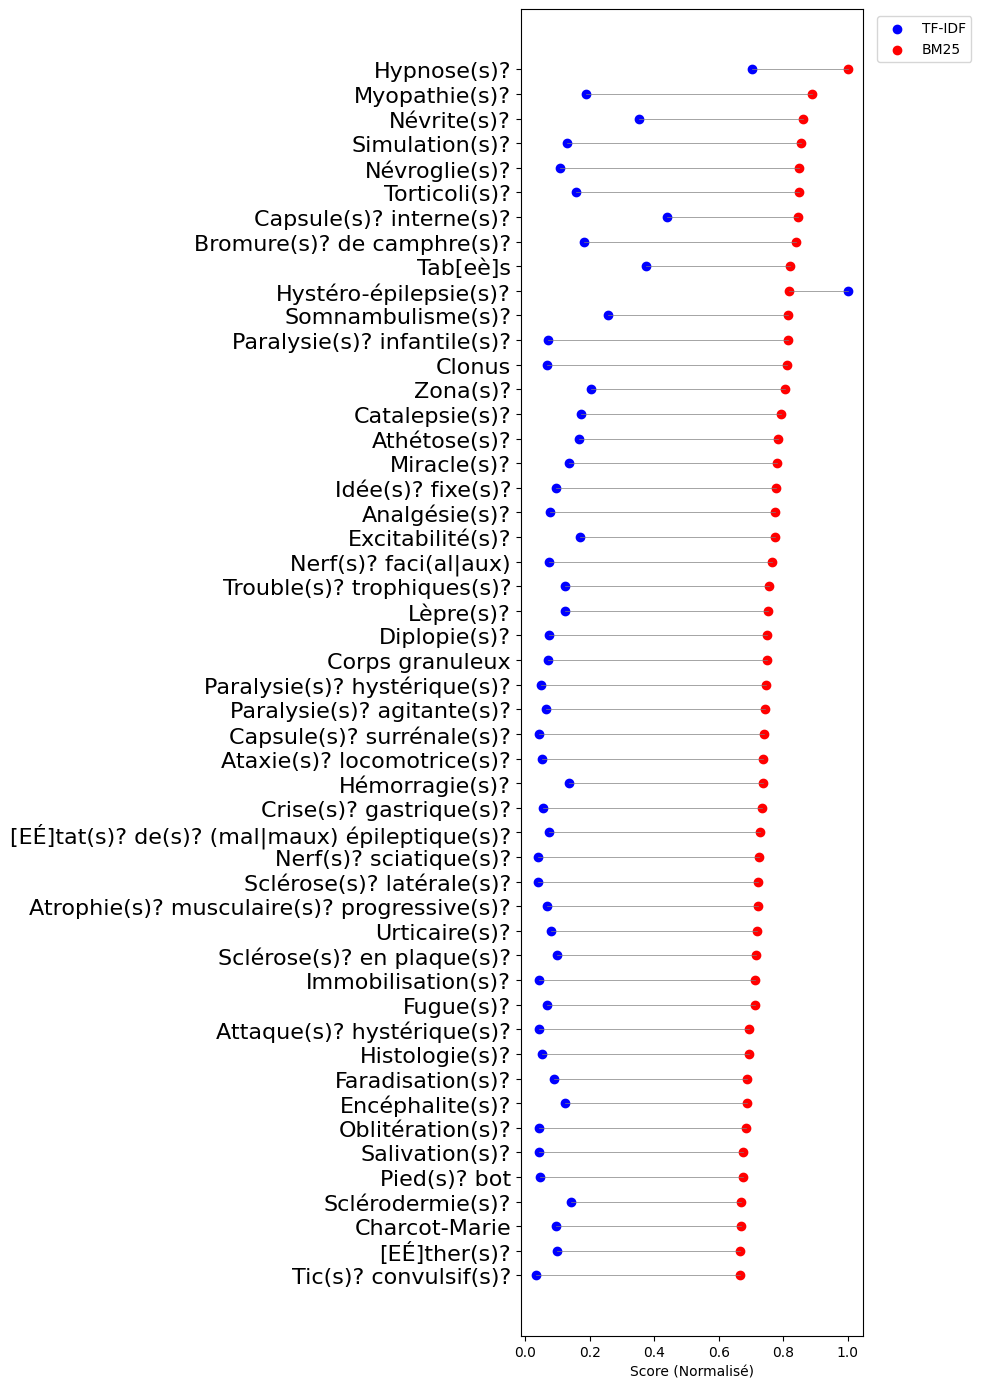

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("output_autres_corpus_echantillon_210725.csv")

# Trier selon le score BM25 décroissant et prendre les 50 premiers
sample_df = df.sort_values(by='Normalized BM25', ascending=False).head(50)

# Inverser l’ordre pour que les scores élevés soient en haut
sample_df = sample_df[::-1]

# Extraire les colonnes nécessaires
terms = sample_df['Regex']
tfidf_scores = sample_df['Normalized TF-IDF']
bm25_scores = sample_df['Normalized BM25']

# Créer le dot plot
fig, ax = plt.subplots(figsize=(10, 14))  # ↑ augmente la hauteur
ax.tick_params(axis='y', labelsize=16)  # ou une autre taille comme 8, 12, etc.

# Tracer les scores TF-IDF
ax.scatter(tfidf_scores, terms, color='blue', label='TF-IDF')

# Tracer les scores BM25
ax.scatter(bm25_scores, terms, color='red', label='BM25')

# Tracer les lignes entre les deux points
for i in range(len(terms)):
    ax.plot([tfidf_scores.iloc[i], bm25_scores.iloc[i]], [terms.iloc[i]] * 2, color='gray', linewidth=0.5)

# Ajouter titres et légendes
ax.set_xlabel("Score (Normalisé)")
# ax.set_title("Top 50 termes selon le score BM25 — Comparaison avec TF-IDF")
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))


plt.tight_layout()
plt.savefig('dot_plot_autres_corpus_echantillon_210725.png', dpi=600)
plt.show()
